# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['palpa',
 'punta arenas',
 'petropavlovsk-kamchatskiy',
 'mahebourg',
 'kruisfontein',
 'vaini',
 'nuuk',
 'alofi',
 'bethel',
 'ustka',
 'maceio',
 'illoqqortoormiut',
 'wanning',
 'rikitea',
 'conceicao do araguaia',
 'albany',
 'esperance',
 'mar del plata',
 'touros',
 'youghal',
 'grand river south east',
 'chuy',
 'changji',
 'ponta do sol',
 'anage',
 'souillac',
 'el espinal',
 'kamsack',
 'thompson',
 'leningradskiy',
 'fayaoue',
 'taolanaro',
 'sentyabrskiy',
 'shache',
 'butaritari',
 'barentsburg',
 'lorengau',
 'georgetown',
 'ancud',
 'lasa',
 'ushuaia',
 'novorzhev',
 'sarkikaraagac',
 'mehamn',
 'barrow',
 'jamestown',
 'maridi',
 'cidreira',
 'carutapera',
 'loutra',
 'lompoc',
 'ambilobe',
 'katsuura',
 'uyuni',
 'torbay',
 'saldanha',
 'bluff',
 'ayan',
 'merauke',
 'port moresby',
 'mechanicsville',
 'busselton',
 'cape town',
 'asau',
 'vao',
 'bosaso',
 'diego de almagro',
 'castro',
 'tigil',
 'tuatapere',
 'flinders',
 'arraial do cabo',
 'mataura',
 'paamiut',

In [40]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cities_updated = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
print(f"Beginning Data Retrieval")
print("-------------------------")
for num, city in enumerate(cities, start=1):
    response = requests.get(query_url + city).json()
    try:
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']["humidity"])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        cities_updated.append(city)
        print(f"Processing {num}, City: {city}")
    
    except KeyError:
        print("City not found, skipping")
print("-------------------------")    
print(f"Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrieval
-------------------------
Processing 1, City: palpa
Processing 2, City: punta arenas
Processing 3, City: petropavlovsk-kamchatskiy
Processing 4, City: mahebourg
Processing 5, City: kruisfontein
Processing 6, City: vaini
Processing 7, City: nuuk
Processing 8, City: alofi
Processing 9, City: bethel
Processing 10, City: ustka
Processing 11, City: maceio
City not found, skipping
Processing 13, City: wanning
Processing 14, City: rikitea
Processing 15, City: conceicao do araguaia
Processing 16, City: albany
Processing 17, City: esperance
Processing 18, City: mar del plata
Processing 19, City: touros
Processing 20, City: youghal
City not found, skipping
Processing 22, City: chuy
Processing 23, City: changji
Processing 24, City: ponta do sol
Processing 25, City: anage
Processing 26, City: souillac
Processing 27, City: el espinal
Processing 28, City: kamsack
Processing 29, City: thompson
Processing 30, City: leningradskiy
Processing 31, City: fayaoue
City not found, ski

City not found, skipping
City not found, skipping
Processing 269, City: aklavik
Processing 270, City: rio bueno
Processing 271, City: shahrud
Processing 272, City: visegrad
Processing 273, City: turan
Processing 274, City: binzhou
Processing 275, City: coffs harbour
Processing 276, City: murray bridge
Processing 277, City: qaanaaq
Processing 278, City: lavrentiya
Processing 279, City: kulhudhuffushi
Processing 280, City: praia da vitoria
Processing 281, City: akyab
Processing 282, City: guhagar
Processing 283, City: dillon
Processing 284, City: rio gallegos
Processing 285, City: nhulunbuy
Processing 286, City: kaveripattinam
Processing 287, City: camopi
Processing 288, City: porto empedocle
Processing 289, City: bogale
Processing 290, City: sotuta
Processing 291, City: port augusta
Processing 292, City: lumberton
City not found, skipping
City not found, skipping
Processing 295, City: khandyga
Processing 296, City: baruun-urt
Processing 297, City: tankhoy
Processing 298, City: wajima
Pr

Processing 535, City: roma
City not found, skipping
Processing 537, City: richards bay
Processing 538, City: taicheng
Processing 539, City: shreveport
Processing 540, City: blagoyevo
Processing 541, City: hervey bay
Processing 542, City: lewisporte
Processing 543, City: aden
Processing 544, City: jalu
Processing 545, City: los llanos de aridane
Processing 546, City: paulo afonso
Processing 547, City: kasongo-lunda
Processing 548, City: dapaong
Processing 549, City: marsa matruh
Processing 550, City: seoul
Processing 551, City: abu samrah
Processing 552, City: ankazoabo
Processing 553, City: eyl
Processing 554, City: huicungo
Processing 555, City: charters towers
Processing 556, City: madikeri
Processing 557, City: wamba
Processing 558, City: ketchikan
Processing 559, City: ca mau
Processing 560, City: badou
Processing 561, City: lake shore
Processing 562, City: klaebu
Processing 563, City: rafaela
Processing 564, City: coihaique
City not found, skipping
City not found, skipping
Process

In [31]:
#confirm lists are all same length for data frame
print(len(cities_updated),
len(latitude),
len(temperature),
len(humidity),
len(cloudiness),
len(wind_speed))

557 557 557 557 557 557


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
#define dictionary with lists created in loop above
weather_dict = {
    "City": cities_updated,
    "Latitude": latitude,
    "Temperature": temperature,
    "% Humidity": humidity,
    "% Cloudiness": cloudiness,
    "Wind Speed (mph)": wind_speed
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Latitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
0,palpa,-14.5336,73.06,63,59,2.53
1,punta arenas,-53.1500,44.71,87,100,8.05
2,petropavlovsk-kamchatskiy,53.0452,37.99,41,75,17.90
3,mahebourg,-20.4081,77.29,73,40,9.22
4,kruisfontein,-34.0033,60.89,91,78,4.29


In [36]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# saving the dataframe 
weather_df.to_csv(output_data_file)

In [37]:
#view stats on data frame
weather_df.describe()

,Latitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
count,557.000000,557.000000,557.000000,557.000000,557.000000
mean,19.591584,58.773591,70.741472,57.615799,8.538546
std,33.197805,22.413461,20.604828,39.727303,5.615554
min,-54.800000,-8.660000,1.000000,0.000000,0.000000
25%,-8.838900,40.480000,62.000000,15.000000,4.160000
50%,21.516700,64.310000,74.000000,73.000000,7.490000
75%,46.616600,77.290000,86.000000,99.000000,11.300000
max,78.218600,97.880000,100.000000,100.000000,31.070000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
#max humidity is 100% so skipping this step

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

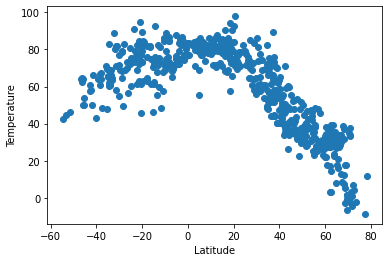

In [68]:
# Create a Scatter Plot for latitude vs temp
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("../output_data/latvstemp.png")
plt.show()

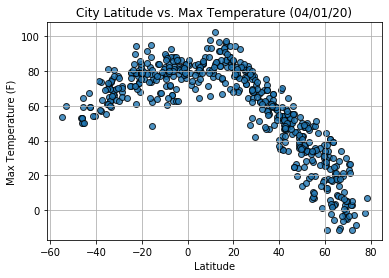

## Latitude vs. Humidity Plot

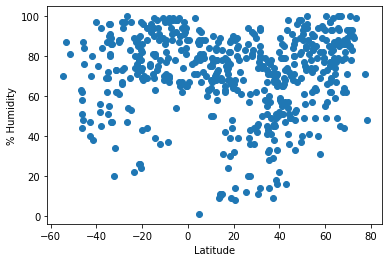

In [69]:
# Create a Scatter Plot for latitude vs % humidity
x_values = weather_df['Latitude']
y_values = weather_df['% Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.savefig("../output_data/north_latvshum.png")
plt.show()

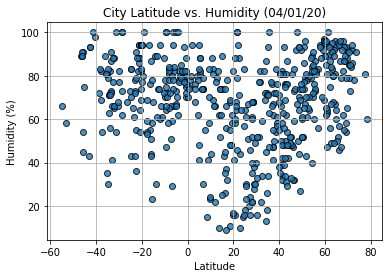

## Latitude vs. Cloudiness Plot

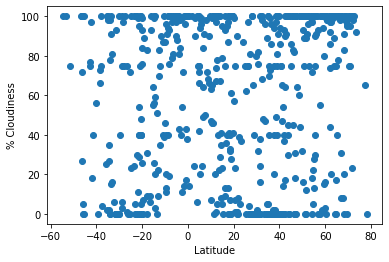

In [70]:
# Create a Scatter Plot for latitude vs % cloudiness
x_values = weather_df['Latitude']
y_values = weather_df['% Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.savefig("../output_data/latvscloud.png")
plt.show()

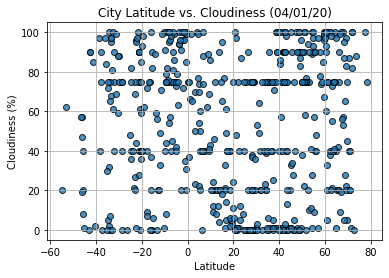

## Latitude vs. Wind Speed Plot

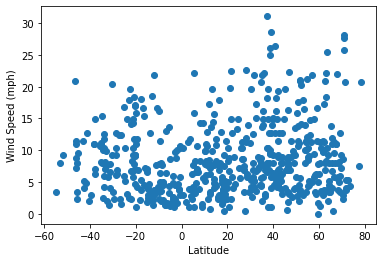

In [71]:
# Create a Scatter Plot for latitude vs wind speed
x_values = weather_df['Latitude']
y_values = weather_df['Wind Speed (mph)']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../output_data/latvswind.png")
plt.show()

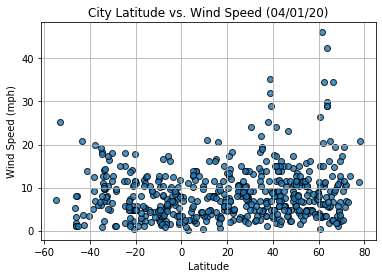

## Linear Regression

In [81]:
from scipy import stats

#define data frames for north and south hemispheres
north_hem_df = weather_df[weather_df["Latitude"] >= 0]
south_hem_df = weather_df[weather_df["Latitude"] <0]
north_hem_df.head()

,City,Latitude,Temperature,% Humidity,% Cloudiness,Wind Speed (mph)
2,petropavlovsk-kamchatskiy,53.0452,37.99,41,75,17.90
6,nuuk,64.1835,32.61,59,100,9.22
8,bethel,41.3712,40.50,65,14,5.01
9,ustka,54.5805,36.59,83,22,11.30
11,wanning,18.8003,80.53,66,61,5.17


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8280400741060423


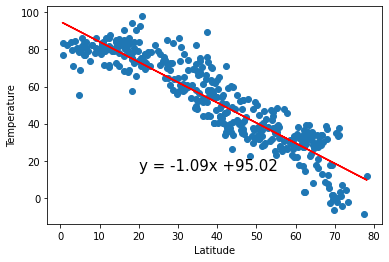

In [100]:
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Temperature']

#Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("../output_data/north_latvstemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.30104000906522144


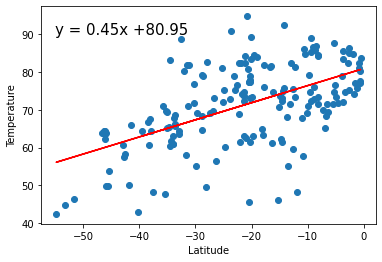

In [99]:
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Temperature']

#Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-55,90),fontsize=15,color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("../output_data/south_latvstemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0457083111936256


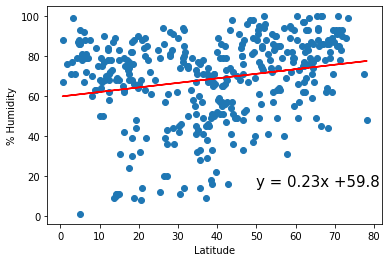

In [87]:
x_values = north_hem_df['Latitude']
y_values = north_hem_df['% Humidity']

#Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.annotate(line_eq,(50,15),fontsize=15,color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("../output_data/north_latvshum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07801087970575846


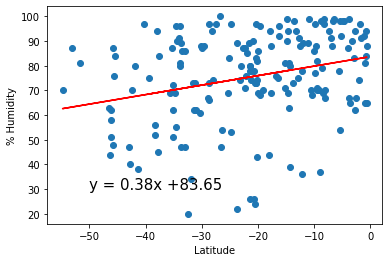

In [89]:
x_values = south_hem_df['Latitude']
y_values = south_hem_df['% Humidity']

#Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.annotate(line_eq,(-50,30),fontsize=15,color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("../output_data/south_latvshum.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.027641099121363283


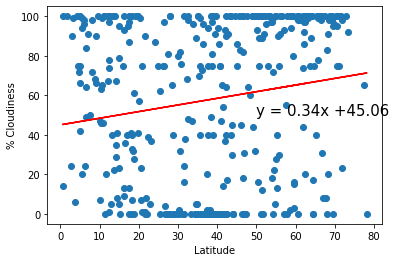

In [92]:
x_values = north_hem_df['Latitude']
y_values = north_hem_df['% Cloudiness']

#Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.annotate(line_eq,(50,50),fontsize=15,color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("../output_data/north_latvscloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.018802414421507218


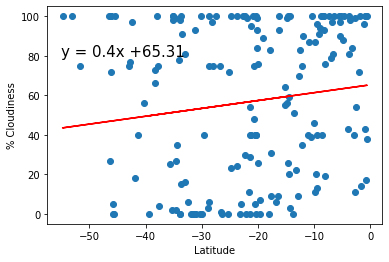

In [98]:
x_values = south_hem_df['Latitude']
y_values = south_hem_df['% Cloudiness']

#Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.annotate(line_eq,(-55,80),fontsize=15,color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("../output_data/south_latvscloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.019752215908701663


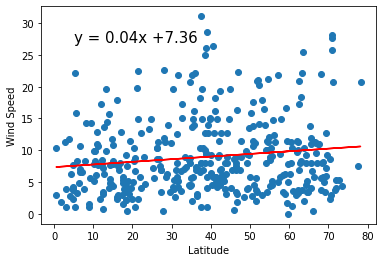

In [103]:
x_values = north_hem_df['Latitude']
y_values = north_hem_df['Wind Speed (mph)']

#Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5,27),fontsize=15,color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("../output_data/north_latvswind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03796996827496379


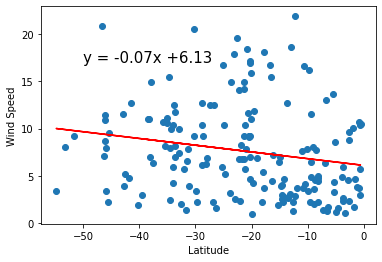

In [105]:
x_values = south_hem_df['Latitude']
y_values = south_hem_df['Wind Speed (mph)']

#Perform a linear regression on latitude vs. temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,17),fontsize=15,color="black")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.savefig("../output_data/south_latvswind.png")
plt.show()